# __Projet numérique 2 : Les équations de Lotka- Volterra__

Emilie Cayatte & Cécile-Aurore Wotawa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## __Question 1 :__

On a : $
    \dot{x_1} = x_1 \times (\alpha - \beta \times x_2)
    $.



Ainsi, dans ce modèle, le nombre de proies dépend de la croissance de la population de proies $\alpha \times x_1$ avec $\alpha$ le taux de reproduction des proies (nourriture considérée illimitée), et le danger lié aux prédateurs $- \beta \times x_1 \times x_2$ avec $\beta$ le taux de prédation. Plus il y a de prédateurs (plus $x_2$ est grand), moins il y aura de proies, d'où le signe $-$.


De même, on a : $\dot{x_2} = - x_2 \times (\gamma - \delta \times x_1)$. 


Ainsi, on a $\gamma$ le taux de mortalité naturelle des prédateurs. Le nombre de prédateurs dépend aussi de la croissance de la population de prédateurs $\delta \times x_1 \times x_2$, qui dépend de la quantité de nourriture, soit le nombre $x_1$ de proies.


Les solutions d'équilibre $(x_1, x_2)$ vérifient $f(x_1, x_2) = 0$, soit ils vérifient le système suivant : 
$$
\left \{
    \begin{array}{ll}
    x_1 \times (\alpha - \beta \times x_2) &=& 0 \\
    - x_2 \times (\gamma - \delta \times x_1) &=& 0
    \end{array}
    \right.
$$

On obtient deux solutions : $(0, 0)$ et $(\gamma / \delta, \alpha / \beta)$, qu'un notera par la suite $\bar{x}$. 

Pour connaitre la stabilité de ces points, on utilise le théorème donnant le lien entre stabilité et stabilité du linéarisé tangent. En appellant $a$ un point d'équilibre de la fonction f, si $J_f(a)$ a au moins une valeur propre à partie réelle strictement positive, alors a est instable.

Or, 
$$  
 J_f(x_1, x_2) =
\begin{pmatrix}
\ \alpha - \beta \times x_2
& 
 \ - \beta \times x_1
 \\
\ \delta \times x_2
&
\ \delta \times x_1 - \gamma

\end{pmatrix}
$$ 

On a donc aux deux points d'équilibre :
$$  
 J_f(0, 0) =
\begin{pmatrix}
\ \alpha
& 
 \ 0
 \\
\ 0
&
\ - \gamma

\end{pmatrix}
$$ 

et

$$  
 J_f(\bar{x}) =
\begin{pmatrix}
\ 0
& 
 \ \frac{- \beta \times \gamma}{\delta}
 \\
\ \frac{\delta \times \alpha}{\beta}
&
\ 0

\end{pmatrix}
$$ 

Ainsi, d'après le théorème énoncé ci-dessus, comme les valeurs propres de $J_f(0,0)$ sont : $\alpha$ et $- \gamma$, soit l'une d'elles est réelle et strictement positive, $(0,0)$ est un point d'équilibre instable.

Cependant, quant à $\bar{x}$, les valeurs propres de $J_f(\bar{x})$ sont $i \times \sqrt(\alpha \gamma)$ et $i \times \sqrt(\alpha \gamma)$, soit purement imaginaires. On ne peut donc pas en déduire la stabilité de $\bar{x}$.


## __Question 2 :__

La fonction $\mbox{display}$ renvoie deux figures de même taille. Sur la première, elle affiche uniquement un champ de vecteurs. Sur la deuxième est superposée le portrait de phase. 

Les figures confirment l'instabilité du point $(0,0)$. De plus, le point $\bar{x}$ semble stable.

In [2]:
def display(f, x):
    X, Y = np.meshgrid(x[0], x[1])
    Z = f(0, [X, Y])
    
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    plt.title("Champ de vecteurs")
    plt.quiver(X, Y, Z[0], Z[1])
    plt.show()
    
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.title("Portrait de phase")
    plt.gca().set_aspect("equal")
    plt.quiver(X, Y, Z[0], Z[1])
    plt.streamplot(X, Y, Z[0], Z[1])
    plt.show()

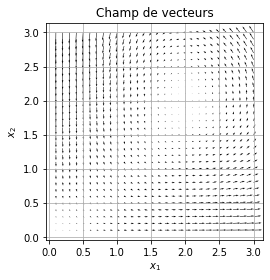

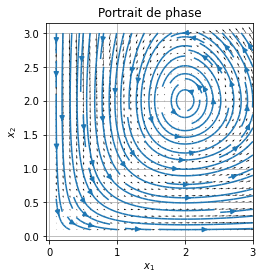

In [3]:
alpha, beta, gamma, delta = 4/3, 2/3, 2, 1

def f(t, x):
    return np.array([x[0]*(alpha - beta*x[1]), -x[1]*(gamma - delta*x[0])])

x = np.array([np.linspace(0.1, 3, 30), np.linspace(0.1, 3, 30)])

display(f, x)

## __Question 3 :__

On suppose par l'absurde qu'il existe une solution 

$$
\begin{array}{ccccc}
x & : &  \mathbb{R} & \to & \mathbb{R}^2 \\ 
& & t & \longmapsto &  (x_{1},x_{2})
\end{array}
$$
initialisée dans $\mathbb{R}_{+}^{*} \times \, \mathbb{R}_{+}^{*}$
telle qu'il existe $t_{0}$ $\in$ $\mathbb{R}$ tq $x_{1}(t_{0})=0$ (ou  $x_{2}(t_{0})=0$ par symétrie  ) , alors la solution coïncide avec 
$$
\begin{array}{ccccc}
y & : &  \mathbb{R} & \to & \mathbb{R}^2 \\ 
& & t & \longmapsto &  (0,x_{2}(t_{0})e^{t-t_{0}} ) 
\end{array}
$$ 
au point $t_{0}$ . $y$ est également solution de l'équation de Lotka Volterra donc elles sont égales.  

En effet si deux solutions de l'équation de Lotka Volterra se coupent en un point elles sont égales par unicité de Cauchy Lipschitz. 


## __Question 4 :__

Soit 
$$
\begin{array}{ccccc}
H & : & \mathbb{R} \times \mathbb{R} & \to & \mathbb{R} \\ 
& & (x_{1},x_{2}) & \longmapsto &  \delta x_{1} - \gamma ln(x_{1}) + \beta x_{2} - \alpha ln(x_{2})
\end{array}
$$
$H$ est dérivable et $H'(t)= \delta \dot x_{1} - \frac{\gamma \dot x_{1}}{x_{1}} + \beta \dot x_{2} - \frac {\alpha \dot x_{2}}{x_{2}}$ 
$H'(t)= \delta x_{1}(\alpha-\beta x_{2}) - \gamma (\alpha-\beta x_{2}) - \beta (\gamma - \delta x_{1}) + \alpha  (\gamma - \delta x_{1})$ 
$H'(t)= \delta x_{1}\alpha-\delta x_{1}\beta x_{2} - \gamma \alpha- \gamma\beta x_{2} + \beta \gamma x_{2} - \beta\delta x_{1}x_{2} + \alpha  \gamma - \delta x_{1}\alpha$
$H'(t)=0$
donc $H$ est constante.
$$
$$
Soit une solution maximale 

$$
\begin{array}{ccccc}
x & : &  ]t_{m}^{-};t_{m}^{+}[ & \to & \mathbb{R}^2 \\ 
& & t & \longmapsto &  (x_{1},x_{2})
\end{array}
$$
initialisée dans $\mathbb{R}_{+}^{*} \times \, \mathbb{R}_{+}^{*}$

Pour montrer que la solution maximale est définie sur $\mathbb{R}$ on suppose par l'absurde que   par exemple $t_{m}^{+}$ est fini. 
$\;$ 
Alors d'après le théorème du domaine maximal d'existence on a $\lim\nolimits_{ t \to t_{m}^{+} }$ $d((t,x(t),\partial(\mathbb{R} \times \mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*} ))$  $=$ $0$ ou bien $\lim\nolimits_{t \to t_{m}^{+}} \|x(t)\|$ $=$ $+\infty$
. 
Le premier cas n'est pas possible car si $x_{1}$ par exemple tend vers $0$ le $ln(x_{1})$ va diverger vers $+\infty$ et donc comme $\delta x_{1}  + \beta x_{2} - \alpha ln(x_{2})$ est minoré, $H$ tend vers $+\infty$ ce qui est absurde. 

Le second cas n'est pas non plus possible car si $\lim\nolimits_{t \to t_{m}^{+}} \|x(t)\|$ $=$ $+\infty$ cela veut dire que (par symétrie) $x_{1}$ tend vers $+\infty$ (car positif ) et donc comme  $ln(x_{1})=o(x_{1})$ et $\beta x_{2} - \alpha ln(x_{2})$ est minoré alors $H$ tend vers $+\infty$  ce qui est absurde.
$$
$$ 
En conclusion, la solution maximale est définie sur $\mathbb{R}$.


## __Question 5 :__

Pour représenter les courbes de niveau, nous nous sommes appuyés sur le projet numérique précédent. 

In [4]:
def H(t, x):
    return delta * x[0] - gamma * np.log(x[0]) + beta * x[1] - alpha * np.log(x[1])


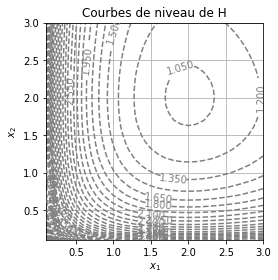

In [5]:
def display_contour(f, x, levels):
    X, Y = np.meshgrid(x[0], x[1])
    Z = f(0, [X, Y])
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    plt.title("Courbes de niveau de H")

display_contour(H, np.array(x), 50)

On constate que $\bar{x}$ se trouve dans un puits de potentiel. Donc,  les solutions restent arbitrairement proche de $a$ quand elles sont initialisées suffisamment proche de $a$. D'où, on en déduit graphiquement que $\bar{x}$ est un point d'équilibre stable.

Ainsi, les points d'équilibre des équations de Lotka-Volterra sont :
- le point $(0,0)$ qui est instable d'après la question 1,
- le point $\bar{x}$ qui est stable (graphiquement).

On peut montrer la stabilité de $\bar{x}$ par la caractérisation de Lyapounov.

## __Question 6 :__

On définit la fonction $\mbox{solve_euler_explicite}$ à partir de la méthode d'Euler explicite. On obtient $x_{j+1}$ par $x_{j+1} = x_j + \Delta t_j \times f(t_j, x_j)$. On ajoute $x_{j+1}$ jusqu'à ce qu'on atteigne le temps final $t_f$. On renvoie alors les vecteurs de temps et de position.


In [6]:
def solve_euler_explicite(f, x0, dt, t0, tf):
    t = [t0]
    x = [x0]
    while t[-1] < tf:
        x.append(x[-1] + dt*f(t[-1], x[-1]))
        t.append(t[-1] + dt)
    return np.array(t), np.array(x)

On vérifie notre fonction sur une équation différentielle aux solutions exactes connues. Dans notre cas, nous avons pris 
$$
\begin{array}{ccccc}
f & : & \mathbb{R} \times \mathbb{R} & \to & \mathbb{R} \\ 
& & (t,x) & \longmapsto &  3 \times x 
\end{array}
$$
On a alors, en choisissant pour condition initiale $x(0) = 1$, $x : t \to exp(3t)$.

Ainsi pour tester notre fonction on trace sur un même graphe la solution exacte, en rouge, et celle obtenue avec la fonction, en bleu. On choisit un pas de temps $dt$ de 0.0001.

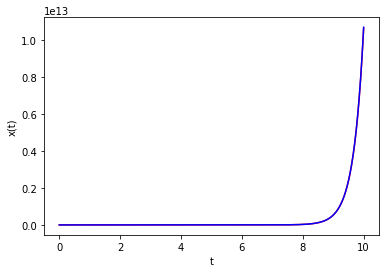

In [7]:
t, x = solve_euler_explicite(lambda t,x : 3*x, 1, 0.0001, 0, 10)
x1 = np.exp(3*t)
plt.plot(t, x, 'r')
plt.plot(t, x1, 'b')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

Les deux courbes bleu et rouge se superposent. On en conclue que notre implémentation est correcte.

Pour visualiser graphiquement la convergence, on trace sur une même figure plusieurs courbes : la solution exacte en bleu et des solutions obtenues avec la fonction $\mbox{solve_euler_explicite}$ pour des pas de temps différents en rouge, orange et jaune (de 0.001 à 1).

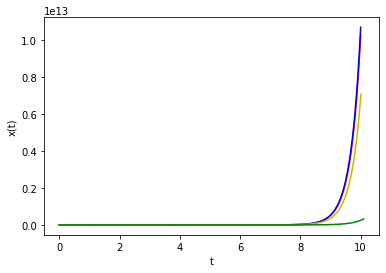

In [8]:
t, x = solve_euler_explicite(lambda t,x : 3*x, 1, 0.001, 0, 10)
t2, x2 = solve_euler_explicite(lambda t,x : 3*x, 1, 0.01, 0, 10)
t3, x3 = solve_euler_explicite(lambda t,x : 3*x, 1, 0.1, 0, 10)

x1 = np.exp(3*t)

plt.plot(t, x, 'r')
plt.plot(t, x1, 'b')
plt.plot(t2, x2, 'y')
plt.plot(t3, x3, 'g')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

On observe ainsi la convergence du schéma lorsque le pas de temps $dt$ tend vers 0.

## __Question 7 :__

On utilise à présent la fonction implémentée pour simuler les équations de Lotka-Volterra.

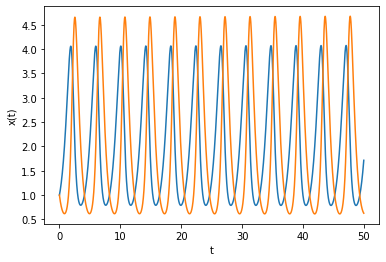

In [9]:
t, x = solve_euler_explicite(f, np.array([1, 1]), 0.0001, 0, 50)

plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

On constate que les populations de proies et prédateurs ont un comportement très étrange : elles sont quasi sinusoidales.

Cette résolution n'est donc pas fidèle à la réalité car les populations proies/prédateurs n'ont pas une telle évolution.

On peut également tracer l'évolution de la fonction H.

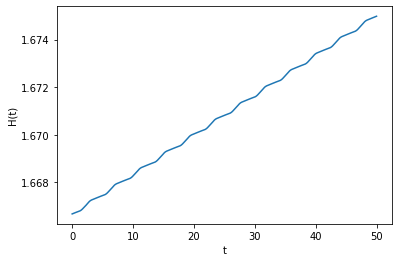

In [10]:
h = [H(t[i], x[i]) for i in range(len(x))]

plt.plot(t, h)
plt.xlabel("t")
plt.ylabel("H(t)")
plt.show()

On s'attend d'après la question 4 à ce que H soit constante, ce qui n'est pas le cas. Cette résolution est donc inadaptée.

## __Question 8 :__

On définit à présent la fonction $\mbox{solve_euler_implicite}$ à partir de la méthode présentée dans le cours. Ainsi, $x_{j+1}$ est défini par $x_{j+1} = x_j + \Delta t_j \times f(t_{j+1}, x_{j+1})$, soit  $x_{j+1}$ est le point fixe de l'application $F_j$ définie par $F_j(x) = x_j + \Delta t_j \times f(t_{j+1}, x)$ à $x_j$, $\Delta_j$, $t_{j+1}$ fixés.

On utilise à présent la méthode itérative de construction de ce point fixe. On part de la valeur donnée par le schéma d'Euler explicite, soit $x_{j,0} = x_j + \Delta t_j \times f(t_j, x_j)$, et on affine ensuite par l'algorithme du point fixe en itérant un nombre $itermax$ de fois $x_{j, k+1} = F(x_{j, k})$.

On obtient alors un nouveau point.

In [11]:
def solve_euler_implicite(f, x0, dt, t0, tf, itermax = 100):
    t = [t0]
    x = [x0]
    while t0 < tf:
        x1 = x0 + dt*f(t0, x0)
        def F(t, x):
            return x0 + dt*f(t, x)
        for i in range(itermax):
            x1 = F(t0, x1)
        x.append(x1)
        x0 = x1
        t0 += dt
        t.append(t0)
    return np.array(t), np.array(x)

On vérifie notre fonction sur la même équation différentielle aux solutions exactes connues. Rappel, nous avons pris 
$$
\begin{array}{ccccc}
f & : & \mathbb{R} \times \mathbb{R} & \to & \mathbb{R} \\ 
& & (t,x) & \longmapsto &  3 \times x 
\end{array}
$$
On a alors, en choisissant pour condition initiale $x(0) = 1$, $x : t \to exp(3t)$.

Ainsi pour tester notre fonction on trace sur un même graphe la solution exacte, en rouge, et celle obtenue avec la fonction, en bleu. On choisit un pas de temps $dt$ de 0.0001.

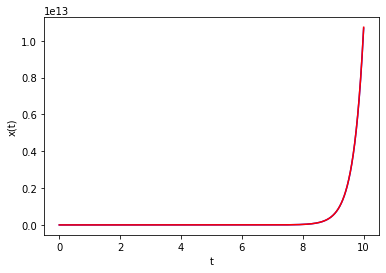

In [12]:
t, x = solve_euler_implicite(lambda t, x : 3*x, 1, 0.0001, 0, 10)
x1 = np.exp(3*t)

plt.plot(t, x1, 'b')
plt.plot(t,x, 'r')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

On utilise maintenant notre fonction $\mbox{solve_euler_implicite}$ pour résoudre les équations de Lotka-Volterra.



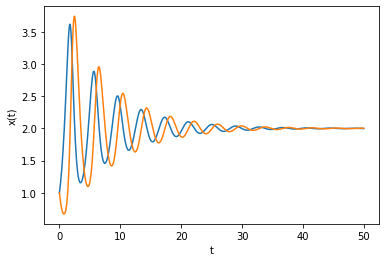

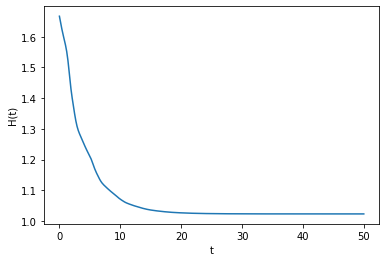

In [13]:
t, x = solve_euler_implicite(f, np.array([1, 1]), 0.1, 0, 50)
h = [H(t[i], x[i]) for i in range(len(x))]

plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

plt.plot(t, h)
plt.xlabel("t")
plt.ylabel("H(t)")
plt.show()

On observe cette fois-ci des oscillations sur les populations de proies et prédateurs, mais qui toutefois ne s'annulent jamais. L'amplitude de ces oscillations diminue progressivement au cours du temps jusqu'à ce que les populations se stabilisent.

On en déduit qu'aux temps longs, la solution obtenue par $\mbox{solve_euler_implicite}$ est fidèle à la réalité. De plus, aux temps longs, on constate que H est effectivement constante, contrairement à la solution obtenue avec $\mbox{solve_euler_explicite}$.

## __Question 9 :__

Soit $x$ une solution de l'équation de Lotka Volterra. Comme pour un tel $x$ H est constant, on aura $H(x_{1},x_{2})-H_{0}=H(x_{1},x_{2})-H(x(0))=0$. Donc $x$ est également solution de ce système. 

Soit maintenant $x$ une solution du système. On pose $x(0)=x_{0}$ D'après le théorème d'existence  de Cauchy Lipschitz appliqué aux équations de Lotka Volterra avec pour condition initiale $x_{0}$, il existe une solution $y$. Celle ci est d'après le début de la question solution du nouveau système. Donc $x$ et $y$ sont solutions du système avec la même condition initiale, par le théorème d'unicité de Cauchy Lispchitz elles sont égales. Donc $x$ est solution de Lotka Volterra.

Ainsi les solutions de Lotka Volterra sont exactement les solutions pour tout choix de
 $$
\begin{array}{ccccc}
u & : &  \mathbb{R}^2 & \to & \mathbb{R}^2 \\ 
\end{array}
$$


## __Question 10 :__
$H((x(t))-H_0= \delta x_1-\gamma ln(x_1) + \beta x_2 - \alpha ln(x_2)-H_0$

$\frac{d(H(x(t)-H_0)}{dt}= \delta \dot x_{1} - \frac{\gamma \dot x_{1}}{x_{1}} + \beta \dot x_{2} - \frac {\alpha \dot x_{2}}{x_{2}}
$ 



$\frac{d(H(x(t)-H_0)}{dt}= \frac{ \dot x_{1}}{x_{1}}(\delta x_1 -\gamma)+ \frac{ \dot x_{2}}{x_{2}}(\beta x_2 - \alpha)$


$\frac{d(H(x(t)-H_0)}{dt}= (\alpha - \beta x_2) (\delta x_1 - \gamma) -  (\gamma - \delta x_1) (\beta x_2 - \alpha) - (u_1(x_1,x_2) \frac {\delta x_1 - \gamma}{x_1} + u_2(x_1,x_2) \frac {\beta x_2 - \alpha}{x_2}) (H(x(t)-H_0)$

$\frac{d(H(x(t)-H_0)}{dt}=0 -  (u_1(x_1,x_2) \frac {\delta x_1 - \gamma}{x_1} + u_2(x_1,x_2) \frac {\beta x_2 - \alpha}{x_2}) (H(x(t)-H_0)$


On calcule 
$$ 
\nabla H(x_1,x_2) =
\begin{pmatrix}
\delta - \frac{\gamma}{x_1} \\

 \beta - \alpha/{x_2}
\end{pmatrix}
$$ 

$$ 
\nabla H(x_1,x_2)=
\begin{pmatrix}
 \frac{\delta x_1 -\gamma}{x_1} \\

  (\beta x_2 -\alpha)/{x_2}
\end{pmatrix}
$$ 

On choisit $u(t)= k \times \nabla H(x(t))$

Alors $\frac{d(H(x(t)-H_0)}{dt}= - k\|\nabla H(x(t))\|^2 \times (H(x(t)-H_0)$


On se place à une distance strictement positive de $\bar x$ donc il existe $c>0$ tq $\|x(t)-\bar x \|>c$

Et on a $\lim\nolimits_{\|x, y\| \to +\infty, \, x,y >0} \|\nabla H(x,y)\|$ $=$ $+\infty$

Alors il existe $m>0$ tel que $\forall t \in \mathbb{R}, \|\nabla H(x(t))\|>m$ .

1er cas: $G(t)=H(x(t))-H_0 >0$
Supossons par l'absurde que $G$ change de signe: alors il existe $x_1$ et $x_2$ tq $G(x_1)<0$ et $G(x_2)>0$. 
Donc par continuité de $G$ et par le théorème des valeurs intermédiaires, il existe $x_0$ entre $x_1$ et $x_2$ tel que $G(x_0)=0$. Alors par le théorème d'unicité de Cauchy Lipschitz appliqué à $G$ solution de l'équation du début de question, $G=0$. 
Absurde, donc $G$ ne peut pas changer de signe. 

Donc en utilisant les informations précédentes: 
$\frac{d(H(x(t)-H_0)}{dt} =- k\|\nabla H(x(t))\|^2 \times (H(x(t)-H_0) \le -km^2(H(x(t)-H_0)$
donc $G'+km^2G \le 0$
Posons $g=G'+km^2G \le 0$ 
Alors $G(t)= e^{-km^2t}(G(0)+ \int_{0}^t \mathrm{e^{km^2u}g(u)du})$ Or $\int_{0}^t \mathrm{e^{km^2u}g(u)du}) \le 0$ car $g$ est négative. Donc $G(t) \le G(0)e^{-km^2t}$ avec $G(0)>0$ ce qui montre bien la convergence exponentielle vers 0 de $G$ et donc de $H$ vers $H_0$. 


2eme cas: On suppose maintenant $G(t)=H(x(t))-H_0 <0$ avec $G$ toujours de signe constant pour les mêmes raisons. On a alors par la même démarche $g=G'+km^2G \ge 0$. Donc $G(t)= e^{-km^2t}(G(0)+ \int_{0}^t \mathrm{e^{km^2u}g(u)du})$ Or $\int_{0}^t \mathrm{e^{km^2u}g(u)du}) \ge 0$, d'où $G(t) \ge G(0)e^{-km^2t}$ avec $G(0)<0$ ce qui permet de conclure. 


## __Question 11 :__

$k$ contrôle la vitesse de décroissance exponentielle. Plus $k$ est grand, plus $H(x(t)) - H_0$ converge rapidement vers 0, soit plus $h(x(t))$ converge rapidement vers $H_0$. Il peut donc être, en théorie, être choisi arbitrairement grand. Or, en pratique, on est limité par une précision de l'ordre de l'$\epsilon{machine}$. Ainsi, on ne peut pas le choisir arbitrairement grand.

Pour assurer la stabilité de $H$, on peut utiliser sa convergence vers $H_0$ montrée à la question 10. On modifie donc l'implémentation du schéma d'Euler en cherchant la solution du système de la question 9, au lieu de celle des équations de Lotka-Volterra.